# Costa Rica Institute of Technology
* Course: MP-6122 Pattern Recognition
* Student: Jose Martinez Hdez
* Year: 2022
* Notebook 2: Supervised Learning Models

# Importing Data

In [1]:
# Importing libaries 
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from google.colab import drive, data_table


warnings.filterwarnings("ignore")
warnings.warn("this will not show")

data_table.enable_dataframe_formatter()
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Classification Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MP6122/dataset/breast-cancer-wisconsin.data')
df.columns = ['code_number', 'Clump_Thickness','Uniformity_of_Cell_Size' ,'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
              'Single_Epithelial_Cell_Size',  'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli' ,'Mitoses','Class']
df.head()

,code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
df = df.replace('?', np.nan)
df.dropna(inplace=True)

In [4]:
df.Class = df.Class.map({2: 0, 4:1})

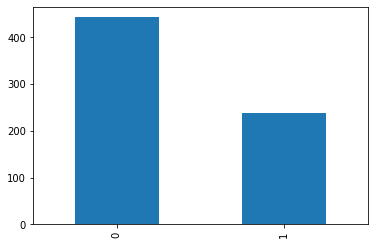

In [5]:
df.Class.value_counts().plot.bar()

In [6]:
X = df.drop(['code_number','Class'],axis=1).values
Y = df.Class.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
df.Class.unique()

array([0, 1])

## Regression Data

In [8]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('/content/drive/MyDrive/MP6122/dataset/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,0
1,1015425,3,1,1,1,2,2,3,1,1,0
2,1016277,6,8,8,1,3,4,3,7,1,0
3,1017023,4,1,1,3,2,1,3,1,1,0
4,1017122,8,10,10,8,7,10,9,7,1,1


In [9]:
column_sels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
x = data.loc[:,column_sels]
y = data['MEDV']

In [10]:
min_max_scaler = MinMaxScaler()
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)

# Models

## Linear Regression (Regression)

### Conceptual Explanation 

Linear Regression is the supervised machine learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

<img src="https://drive.google.com/uc?id=11R83vkY9NU7-fVvjg8DbkM14dzNhWS1H" width=400 height=400 />

### Mathematical 

From basic linear algebra, we should remember that the linear regression model is a linear combination of the independent variables, that is described by the following equation: 

\begin{equation}
y = b_0 + b_1 \cdot x
\end{equation}

Where $b_0$ is the intercept and $b_1$ is the slope.

So, the main idea of linear regression is to find the best fit line between the independent and dependent variables. This can be done by finding the value of the slope ($b_1$) and the intercept ($b_0$) in the linear equation that reduces the error between a predicted value from the model and the actual value from the data. 

We create a hipotetic model by using the following equation:

\begin{equation}
h(x) = b_0 + b_1 \cdot x
\end{equation}

And then we calculate the error between the actual value and the predicted value by using the following cost equation of the squared error:

\begin{equation}
J(b_0, b_1) = \frac{1}{2m} \sum_{1=n}^{i=1} (h(x_n) - y_n)^2
\end{equation}

### Optimal Applications 

This model has the following assumptions and limitations: 

1. *Linearity*: The relationship between the dependent and independent variables is linear.
2. *Homoscedasticity*: The error is homoscedastic. The variance of the error terms should be constant i.e the spread of residuals should be constant for all values of X. This assumption can be checked by plotting a residual plot. If the assumption is violated then the points will form a funnel shape otherwise they will be constant.
3. *Independence*:  The variables should be independent of each other i.e no correlation should be there between the independent variables.
4. *Normality*: The $x$ and $y$ variables should be normally distributed.

Basically, this model will work well when the assumptions are satisfied. The violation of the assumptions leads to a decrease in the accuracy of the model therefore the predictions are not accurate and error is also high.

**References**: 

- https://towardsdatascience.com/ensemble-models-5a62d4f4cb0chttps://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/#:~:text=In%20the%20most%20simple%20words,the%20dependent%20and%20independent%20variable.
- https://www.youtube.com/watch?v=1-OGRohmH2s
- https://towardsdatascience.com/mathematics-for-machine-learning-linear-regression-least-square-regression-de09cf53757c
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [11]:
# Example of Linear Regression
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x, y)
print(regressor.score(x, y))
print(regressor.coef_)
print(regressor.intercept_)



0.7406426641094095
[ -9.60975755   4.64204584   0.56083933   2.68673382  -8.63457306
  19.88368651   0.06721501 -16.22666104   7.03913802  -6.46332721
  -8.95582398   3.69282735 -19.01724361]
26.620267584687767


## Logistic Regression (Classification)

### Conceptual Explanation 

Logistic regression, despite its name, is a classification model rather than regression model. Logistic regression is a simple and more efficient method for binary and linear classification
problems. It is a classification model, which is very easy to realize and achieves very good performance with linearly separable classes. It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression. Logistic regression is fast and relatively uncomplicated, and it’s convenient for you to interpret the results. Although it’s essentially a method for binary classification, it can also be applied to multiclass problems.

![sigmoid](https://drive.google.com/uc?id=11i8CA3Rw1NNFf5HlQ2kfVyJFZ4vBJ_U3)

### Mathematical 

The logistic regression model is a linear combination of the independent variables, that is described by the following equation:

\begin{equation}
f(x) = \frac{1}{1 + e^{-m \cdot x + b}}
\end{equation}

That function is also called the sigmoid function. A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. The sigmoid function has values very close to either 0 or 1 across most of its domain. This fact makes it suitable for application in classification methods.

In this model, we have the linear combination of the independent variables, that is described by the following equation:

\begin{equation}
h(x) = b_0 + b_1 \cdot x_1 + b_2 \cdot x_2 + ... + b_n \cdot x_n
\end{equation}

That función is called the *logit*. The variables $b_0, b_1, b_2, ..., b_n$ are the coefficients or preticted weights of the linear combination that comes from the $-m \cdot x + b$ term of sigmoid function. Similar as in linear regression, the idea is to create a cost function that determines the best predicted weights $b_0, b_1, b_2, ..., b_n$  such that the function $f(x)$ is as close as possible to all actual responses $𝑦_i$ values. 

\begin{equation}
J(b_0, b_1, .., b_n) = \sum_{1=n}^{i=1} y_n\log(f(x_n)) + (1-y_n)\log(1-f(x_n))
\end{equation}

The idea of using logarithms is to simplify the cost function. By minimizing the cost function, we can find the best fit line between the independent and dependent variables. The most common way to solve the logistic regression problem is to use the gradient descent algorithm and also with the maximum likelihood estimator (MLE). The main aim of MLE is to find the value of our parameters for which the likelihood function is maximized. The likelihood function is nothing but a joint pdf of our sample observations and joint distribution is the multiplication of the conditional probability for observing each example given the distribution parameters. 

Gradient descent changes the value of our weights in such a way that it always converges to minimum point or we can also say that, it aims at finding the optimal weights which minimize the loss function of our model. It is an iterative method that finds the minimum of a function by figuring out the slope at a random point and then moving in the opposite direction.

### Optimal Applications

Logistic regresssion performs well for binary classification problems. It is also a good model for classification problems where the dependent variable is categorical. It has the advantage of being fast and easy to interpret.

Lastly, the most significant advantage of logistic regression over other algoritmhs is transparency. Complex models, as neural networks, work as a black box - you never know why it makes one or another decision. There are a lot of highly regulated industries where this approach is not acceptable. Logistic regression, in contrast, may be called the “white box”. You always know why you rejected a loan application or why your patient’s diagnosis looks good or bad. That is what we’ll talk about in detail.

**References**: 

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- Practical Machine Learning for Data Analysis Using Python
- Machine Learning Guide for Oil and Gas Using Python
- https://realpython.com/logistic-regression-python/#logistic-regression-overview
- https://en.wikipedia.org/wiki/Sigmoid_function
- https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/#:~:text=Logistic%20Regression%20is%20another%20statistical,pass%20this%20exam%20or%20not
- https://medium.com/analytics-vidhya/logistic-regression-b35d2801a29c
- https://activewizards.com/blog/5-real-world-examples-of-logistic-regression-application

In [12]:
# Example of Logistic Regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test, y_hat)}')

print(clf.classes_)
print(clf.coef_)
print(clf.intercept_)

Accuracy Score is 0.9562043795620438
[0 1]
[[0.37455966 0.21822076 0.50280676 0.2547255  0.02534985 0.34896106
  0.29500212 0.23440608 0.46061253]]
[-9.5864799]


## Support Vector Machines (Classification)

### Conceptual Explanation 

Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well, as it could be seen in the following figure.

![svm](https://drive.google.com/uc?id=11U2Z1d4WNfR7gr8p6JMevcyJ1BNyPOBD)

### Mathematical 

The main objective of SVM is to find the optimal hyperplane which linearly separates the data points in two component by maximizing the margin.

A hyper-plane means plane that linearly divide the n-dimensional data points in two component. In case of 2D, hyperplane is line, in case of 3D it is plane.It is also called as n-dimensional line. That hyper-plane is defined by the following equation, for the case of 2D:

\begin{equation}
H(x): w\cdot x + b=0
\end{equation}

SVM problem can be formulated as:

\begin{equation}
\begin{matrix}
w \cdot x_i + b \geq  1 & y_i = +1 \\
w \cdot x_i + b \leq  -1 & y_i = -1 \\
\end{matrix}
\end{equation}

Combined with the above equation, we can rewrite the equation as:

\begin{equation}
\begin{matrix}
y_i (w \cdot x_i + b) - 1 \geq 0 & y_i = +1, -1 \\
\end{matrix}
\end{equation}

The distance between a point and a line can be calculated as:

\begin{equation}
d =\frac{\left| a \cdot x_0 + b \cdot y_0 +c \right|}{\sqrt{a^2 + b^2}}
\end{equation}

For a hyper-plane, the distance between a point and a line can be calculated as:

\begin{equation}
d_H =\frac{\left| w(x_0) + b \right|}{\left|\left| w \right| \right|}
\end{equation}

Since the idea is to maximize the distance, we should minimize the euclidean distance. So, we can rewrite the equation as:

\begin{equation}
\left|\left| w \right| \right| = \sqrt{\sum_{j=1}^{D} w_j^2}
\end{equation}

Finally, the optimization criterion is:

\begin{equation}
min \left|\left| w \right| \right| = min \frac{1}{2} \left|\left| w \right| \right|^2 
\end{equation}

What if data points is not linearly separable?

In such cases, we do not see a straight line frontier directly in current plane which can serve as the SVM. In such cases, we need to map these vector to a higher dimension plane so that they get segregated from each other, that algorithm is called kernel SVM, which well be covered in the next sections.

### Optimal Applications

Some of the pros of SVM are:

1. It works really well with a clear margin of separation.
2. It is effective in high dimensional spaces.
3. It is effective in cases where the number of dimensions is greater than the number of samples.
4. It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

In the other hand, some of the cons of SVM are:

1. It doesn’t perform well when we have large data set because the required training time is higher.
2. It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping.
3. SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. 


Some aplications of SVM are:

1. Handwriting recognition
2. Intrusion detection 
3. Face detection
4. Email classification 
5. Gene classification

**References**: 

- https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm
- https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
- https://www.analyticsvidhya.com/blog/2014/10/support-vector-machine-simplified/?utm_source=blog&utm_medium=understandingsupportvectormachinearticle
- https://www.analyticsvidhya.com/blog/2020/10/the-mathematics-behind-svm/#:~:text=A%20Support%20Vector%20Machine%20or,to%20as%20Support%20Vector%20Classification.
- https://ankitnitjsr13.medium.com/math-behind-support-vector-machine-svm-5e7376d0ee4d

In [13]:
# Example of SVM
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test, y_hat)}')

Accuracy Score is 0.9635036496350365


## Linear Models for multi-class classification (Classification)

### Conceptual Explanation 

The idea in this algoritmh is to reuse the 2-class formulation for k-classes.

![multi-class](https://drive.google.com/uc?id=11o2jjqqHtnhqVCHtg7ypKatkfeFJowDO)

One-vs-Rest (OvR): for each class k train a linear model (SVM or Logistic Regression) that is expert in classifying k (one) versus non-k (the rest) meaning we have to create a binary classifier for each class k, which is an expert in separating that class(k) from all the other classes.

One-vs-One (OvO): : for each pair of classes $k$, $k'$), train an SVM that is expert in classifying k versus $k'$.

In either case, make multiclass predictions by combining individual binary predictions.

There are many more multi-class classifiers available like k-NN, naive bayes, decision trees, etc that will be discussed in the next section.

### Mathematical 

This algoritm uses any other binary linear models (SVM or Logistic Regression) to make predictions for each class and then result is combined to make a final model.

### Optimal Applications

Some of the advantages of the multi-class classification are:

1. Linear models are fast to train and make predictions.
2. They scale very well for large or sparse data sets.
3. They are easy to understand.

**References**: 

- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass
- https://medium.com/analytics-vidhya/ml06-intro-to-multi-class-classification-e61eb7492ffd

In [14]:
# Example of Linear Models for multi-class classification
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LinearSVC(random_state=0))
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test, y_hat)}')

Accuracy Score is 0.9635036496350365


## kNN (Classification or Regression)) 

### Conceptual Explanation 

The k-means clustering algorithm is one of the most widely used, effective, and best understood clustering methods.

![knn](https://drive.google.com/uc?id=11mXbIy1CxEaD1y7tcV0UFEarJmkXJeST)

### Mathematical 

In this case, the key is to find the k nearest neighbors of a given point. For that, we need to calculate the distance between the point and all the other points. The most common distance metrics are:

1. Euclidean distance:

\begin{equation}
d =\sqrt{\sum_{j=1}^{D} (x_j - y_j)^2}
\end{equation}

2. Manhattan distance:

\begin{equation}
d =\sum_{j=1}^{D} |x_j - y_j|
\end{equation}

3. Cosine distance:
\begin{equation}
d =\frac{1}{\sqrt{\sum_{j=1}^{D} x_j^2 \cdot y_j^2}} \cdot \left( \sum_{j=1}^{D} x_j y_j \right)
\end{equation}

4. Squared Euclidean distance: 

\begin{equation}
d =\sum_{j=1}^{D} (x_j - y_j)^2
\end{equation}

5. Chebyshev distance:

\begin{equation}
d =\max_{j=1}^{D} |x_j - y_j|
\end{equation}

6. Mahalanobis distance:

\begin{equation}
d =\sqrt{\sum_{j=1}^{D} (x_j - y_j)^2 \cdot \left( \sum_{j=1}^{D} x_j y_j \right)}
\end{equation}

So basically, we create clusters of points and then find the k nearest neighbors of a given point by using any of the distances described above, and in that way we can find the class of the point.

One of the most challenging tasks in this algorithm is to choose the right values of $k$. What should be the right $k$-value? How to choose the $k$-value? Let us find the answer to these questions. If you are choosing the $k$ values randomly, it might be correct or may be wrong. If you will choose the wrong value then it will directly affect your model performance. So there are two methods by which you can select the right value of $k$: 

1. The elbow method

2. The silhouette method 

### Optimal Applications

The pros of k-NN are:

1. It is very simple to implement.
2. It is scalable to a huge data set and also faster to large datasets.
3. It adapts the new examples very frequently.
4. Generalization of clusters for different shapes and sizes.

This cons of k-NN are:

1. It is sensitive to the outliers.
2. Choosing the k values manually is a tough job.
3. As the number of dimensions increases its scalability decreases.

Some of the applications of k-NN are:

1. It is used for classification.
2. It is used for regression.
3. It is used for clustering.
4. It is used for dimensionality reduction.

**References**: 

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
- https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
- https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/
- https://www.simplilearn.com/tutorials/machine-learning-tutorial/k-means-clustering-algorithm
- https://www.cs.cornell.edu/~tomf/publications/supervised_kmeans-08.pdf

In [15]:
# Example of KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test, y_hat)}')

Accuracy Score is 0.9562043795620438


In [16]:
# Example of kNN Regression
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()
regressor.fit(x, y)
print(regressor.score(x, y))


0.850617542134604


## Naive Bayes (Classification)

### Conceptual Explanation 

It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

![naive](https://drive.google.com/uc?id=11xgMrqGRk3NIiIki7Mjj1Dg7nS7E3D05)

### Mathematical 

The Bayes' Theorem states that the probability of an event occurring is a function of the probability of that event and the probability of that event occurring given the evidence that led to its occurrence, that is discribed by the following formula:

\begin{equation}
P(C|x) = \frac{P(x|C)P(C)}{P(x)}
\end{equation}

Where:

- $P(C|x)$ is the probability of the class $C$ given the evidence $x$.
- $P(x|C)$ is the probability of the evidence $x$ given the class $C$.
- $P(C)$ is the probability of the class $C$.
- $P(x)$ is the probability of the evidence $x$.

Using the chain rule, the likelihood P(X∣Ck) can be decomposed as:

\begin{equation}
P(x|Ck) = P(x_1, x_2, ..., x_n|Ck)P(Ck) = P(x_1|x_2, ..., x_n, C_k)P(x_2|x_1, ..., x_n, C_k)...P(x_n|x_1, ..., x_n-1, C_k)P(Ck)
\end{equation}

The above sets of probabilities can be hard and expensive to calculate. Fortunately, with the naive conditional independence assumption, this probability can be also expressed as:

\begin{equation}
P(C|x) = \frac{P(C_k) \prod_{i=1}^{n}P(x_i|C_i)}{P(x)}
\end{equation}

So the problem of Naive Bayes is for different class values of $C_k$, find the maximum of $P(C_k) \prod_{i=1}^{n}P(x_i|C_i)$.

There are three types of Naive Bayes classifiers:

1. Gaussian Naive Bayes
2. Bernoulli Naive Bayes
3. Multinomial Naive Bayes

The different Naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i|C_i)$.

### Optimal Applications

The main advantages of Naive Bayes are: 

1. It is easy and fast to predict class of test data set. It also perform well in multi class prediction.
2. When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
3. It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

And the main cons of Naive Bayes are:

1. It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).
2. On the other side naive Bayes is also known as a bad estimator.
3. Another limitation of Naive Bayes is the assumption of independent predictors. In real life, it is almost impossible that we get a set of predictors which are completely independent.

Some of the applications of Naive Bayes are:

1. Real time Prediction
2. Recommendation System
3. Sentiment Analysis
4. Text Classification
5. Image Classification
6. Fraud Detection

**References**: 

- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html 
- https://medium.com/analytics-vidhya/na%C3%AFve-bayes-algorithm-5bf31e9032a2#:~:text=Naive%20Bayes%20is%20a%20classification,one%20with%20the%20highest%20probability.
- https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
- https://shuzhanfan.github.io/2018/06/understanding-mathematics-behind-naive-bayes/


In [17]:
# Example of Naive Bayes
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=1.0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test, y_hat)}')

Accuracy Score is 0.8978102189781022


## Decision Trees (Classification or Regression)) 

### Conceptual Explanation 

A decision tree is a tree-based model for classification and regression. It is a supervised learning algorithm that is used to make predictions by recursively splitting data instances into smaller and smaller groups, each of which is also a decision tree itself. Decision trees imitate human thinking, so it’s generally easy for data scientists to understand and interpret the results.

![decision-tree](https://drive.google.com/uc?id=11lITuCVXSwR5TsSU1UJk1hwuk5L7NW2L)

Let’s define some key terms of a decision tree.

- Root node: The base of the decision tree.
- Splitting: The process of dividing a node into multiple sub-nodes.
- Decision node: When a sub-node is further split into additional sub-nodes.
- Leaf node: When a sub-node does not further split into additional sub-nodes; represents possible outcomes.
- Pruning: The process of removing sub-nodes of a decision tree.
- Branch: A subsection of the decision tree consisting of multiple nodes.

### Mathematical 

A decision tree resembles, well, a tree. The base of the tree is the root node. From the root node flows a series of decision nodes that depict decisions to be made. From the decision nodes are leaf nodes that represent the consequences of those decisions. Each decision node represents a question or split point, and the leaf nodes that stem from a decision node represent the possible answers. Leaf nodes sprout from decision nodes similar to how a leaf sprouts on a tree branch. This is why we call each subsection of a decision tree a "branch".

How does a tree based algorithms decide where to split?

The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria is different for classification and regression trees. If the dataset consists of N attributes then deciding which attribute to place at the root or at different levels of the tree as internal nodes is a complicated step. By just randomly selecting any node to be the root can’t solve the issue. If we follow a random approach, it may give us bad results with low accuracy.

For solving this attribute selection problem, researchers worked and devised some solutions. They suggested using some criteria like:

1. Information Gain

\begin{equation}
\text{Information Gain} = \text{Entropy}(D) - \sum_{i=1}^{N}P(i) \times \text{Entropy}(D|i)
\end{equation}

2. Gini Index:

\begin{equation}
Gini(x) = 1 - \sum_{i=1}^{N}P(x_i)^2
\end{equation}

3. Variance Impurity

\begin{equation}
\text{Variance Impurity} = \sum_{i=1}^{N}P(x_i) \times \sum_{i=1}^{N}P(x_i)
\end{equation}

4. Entropy

\begin{equation}
\text{Entropy} = - \sum_{i=1}^{N}P(x_i) \times \log(P(x_i))
\end{equation}

5. Chi-Square

\begin{equation}
\text{Chi-Square} = \sum_{i=1}^{N}P(x_i) \times \sum_{i=1}^{N}P(x_i)
\end{equation}

7. Gain Ratio

\begin{equation}
\text{Gain Ratio} = \text{Information Gain} / \text{Variance Impurity}
\end{equation}

We should also consider that decision trees are more likely to overfit the data if the number of attributes is large. Overfitting is one of the key challenges faced while using tree based algorithms. If there is no limit set of a decision tree, it will give you 100% accuracy on training set because in the worse case it will end up making 1 leaf for each observation. Thus, preventing overfitting is pivotal while modeling a decision tree and it can be done in 2 ways:

1. Pruning
2. Setting a maximum depth of the tree

### Optimal Applications

The pros of decision trees are:

1. Works for numerical or categorical data and variables.
2. Models problems with multiple outputs.
3. Tests the reliability of the tree.
4. Requires less data cleaning than other data modeling techniques.
5. Easy to explain to those without an analytical background.

In the other hand, the cons of decision trees are:

1. Affected by noise in the data.
2. Not ideal for large datasets.
3. Can disproportionately value, or weigh, attributes.
4. The decisions at nodes are limited to binary outcomes, reducing the complexity that the tree can handle.
5. Trees can become very complex when dealing with uncertainty and numerous linked outcomes.

The main applications of decision trees are:

1. Classification
2. Regression
3. Recommendation System
4. Sentiment Analysis

**References**: 

- https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/
- https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-understanding-decision-trees-adb2165ccab7
- https://www.datacamp.com/community/tutorials/decision-tree-classification-python
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://www.mastersindatascience.org/learning/introduction-to-machine-learning-algorithms/decision-tree/#:~:text=A%20decision%20tree%20is%20a,that%20contains%20the%20desired%20categorization.

In [18]:
# Example of Decision Trees Classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test, y_hat)}')

Accuracy Score is 0.9416058394160584


In [19]:
# Example of Decision Trees Regression
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x, y)
print(regressor.score(x, y))

print(regressor.feature_importances_)


1.0
[0.03998948 0.00060121 0.00409867 0.00084715 0.05046496 0.57598062
 0.0115331  0.07344814 0.00071385 0.01265229 0.02041985 0.00596534
 0.20328533]


## Random Forests (Classification or Regression)

### Conceptual Explanation 

A random forest is an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

![random-forest](https://drive.google.com/uc?id=121o-uPPJl8OXotKBkr_ya75D45C1fSRf)

### Mathematical 

It works in the following manner:

1. A random subset of the training data is chosen as the initial set of samples.
2. The subset is then split into a number of subsets, each of which is then used to train a decision tree.
3. The resulting decision trees are then combined to form a forest. 
4. The final output is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

### Optimal Applications

The pros of ramdom forests are:

1. This algorithm can solve both type of problems i.e. classification and regression and does a decent estimation at both fronts.
2. One of benefits of Random forest which excites me most is, the power of handle large data set with higher dimensionality. It can handle thousands of input variables and identify most significant variables so it is considered as one of the dimensionality reduction methods. Further, the model outputs Importance of variable, which can be a very handy feature (on some random data set).
3. It has an effective method for estimating missing data and maintains accuracy when a large proportion of the data are missing.
4. It has methods for balancing errors in data sets where classes are imbalanced.
5. The capabilities of the above can be extended to unlabeled data, leading to unsupervised clustering, data views and outlier detection.
6. Random Forest involves sampling of the input data with replacement called as bootstrap sampling. Here one third of the data is not used for training and can be used to testing. These are called the out of bag samples. Error estimated on these out of bag samples is known as out of bag error. Study of error estimates by Out of bag, gives evidence to show that the out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.
 
In the other hand, the cons of random forest are:

1. It surely does a good job at classification but not as good as for regression problem as it does not give precise continuous nature predictions. In case of regression, it doesn’t predict beyond the range in the training data, and that they may over-fit data sets that are particularly noisy.
2. Random Forest can feel like a black box approach for statistical modelers – you have very little control on what the model does.

**References**: 

- https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/
- https://www.analyticsvidhya.com/blog/2014/06/introduction-random-forest-simplified/
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [20]:
# Example of Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test, y_hat)}')

Accuracy Score is 0.9562043795620438


In [21]:
# Example of Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(max_depth=2, random_state=0)
regressor.fit(x, y)
print(regressor.score(x, y))

0.763042092638991


## Kernel Support Vector Machines (Classification)

### Conceptual Explanation 

SVM algorithms use a set of mathematical functions that are defined as the kernel. The function of kernel is to take data as input and transform it into the required form. Different SVM algorithms use different types of kernel functions. 

![kernel](https://drive.google.com/uc?id=11z-qJvrqnyuNqSvin46VaC0H1eZFaud2)

Using kernel functions is very useful in classification problems when the data is not linearly separable.

### Mathematical 

Basically, the main idea is first to find the hyperplane that separates the data. Then, the kernel function is used to transform the data into the required form. Some of the kernel functions are:

1. Polynomial Kernel: 
\begin{equation}
K(x,y) = \alpha \cdot x^T \cdot y + \beta \cdot x^T \cdot x + \gamma \cdot y^T \cdot y
\end{equation}

2. Gaussian Kernel: 
\begin{equation}
K(x,y) = \exp \left( - \frac{||x-y||}{\sigma} \right)
\end{equation}

3. Sigmoid kernel 
\begin{equation}
K(x,y) = \frac{1}{1 + e^{-\gamma \cdot \sum_{i=1}^{N}(x_i - y_i)}}
\end{equation}

4. Laplace Kernel

\begin{equation}
K(x,y) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{1}{2\sigma^2} \left(x-y\right)^2\right)
\end{equation}

5. Bessel Function Kernel

\begin{equation}
K(x,y) = \frac{1}{\pi\sigma^2} \exp\left(-\frac{1}{2\sigma^2} \left(x-y\right)^2\right)
\end{equation}

Once the kernel function is found, the SVM algorithm is applied.

### Optimal Applications

Similar pros and cons of SVM. 

Some of the pros of SVM are:

1. It works really well with a clear margin of separation.
2. It is effective in high dimensional spaces.
3. It is effective in cases where the number of dimensions is greater than the number of samples.
4. It uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

In the other hand, some of the cons of SVM are:

1. It doesn’t perform well when we have large data set because the required training time is higher.
2. It also doesn’t perform very well, when the data set has more noise i.e. target classes are overlapping.
3. SVM doesn’t directly provide probability estimates, these are calculated using an expensive five-fold cross-validation. 

**References**: 

- https://dataaspirant.com/svm-kernels/
- https://data-flair.training/blogs/svm-kernel-functions/

In [22]:
# Example of kernel SVM
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=10, gamma=0.1)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test, y_hat)}')

Accuracy Score is 0.9635036496350365


# Ensemble Methods

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator. 

![ensemble](https://drive.google.com/uc?id=12-uRKenoVsmQKHFYwRj9Vql61zGws9vk)

**References**: 

- https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c
- https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/
- https://www.geeksforgeeks.org/ensemble-methods-in-python/

# Simple Ensemble Methods

## Voting

### Conceptual Explanation 

It is mainly used for classification problems. The method consists of building multiple models independently and getting their individual output called ‘vote’. The class with maximum votes is returned as output.

**References**: 

- https://www.geeksforgeeks.org/ensemble-methods-in-python/
- https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html

In [23]:
# Example of voting

from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = KNeighborsClassifier()
model_3 = DecisionTreeClassifier()

# Making the final model using voting classifier
final_model = VotingClassifier(estimators=[('lr', model_1), ('knn', model_2), ('dt', model_3)], voting='hard')
 
# Predicting the output on the test dataset
final_model.fit(X_train, y_train)

y_hat = clf.predict(X_test)

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test, y_hat)}')

# Model Attributes
print(final_model.estimators_)
print(final_model.named_estimators)
print(final_model.le_)
print(final_model.voting)


Accuracy Score is 0.9635036496350365
[LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier()]
{'lr': LogisticRegression(), 'knn': KNeighborsClassifier(), 'dt': DecisionTreeClassifier()}
LabelEncoder()
hard


## Averaging

### Conceptual Explanation 

It is mainly used for regression problems. The method consists of building multiple models independently and returning the average of the prediction of all the models. In general, the combined output is better than an individual output because variance is reduced.


**References**: 

- https://www.geeksforgeeks.org/ensemble-methods-in-python/
- https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

In [24]:
# Example of averaging

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Splitting between train data into training and validation dataset
AV_train, AV_test, av_train, av_test = train_test_split(x, y, test_size=0.20)

# Initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = KNeighborsRegressor()
model_3 = RandomForestRegressor()
 
# Training all the model on the training dataset
model_1.fit(AV_train, av_train)
model_2.fit(AV_train, av_train)
model_3.fit(AV_train, av_train)

# Predicting the output on the validation dataset
pred_1 = model_1.predict(AV_test)
pred_2 = model_2.predict(AV_test)
pred_3 = model_3.predict(AV_test)

# Final prediction after averaging on the prediction of all 3 models
pred_final = (pred_1+pred_2+pred_3)/3.0

# Printing the root mean squared error between real value and predicted value
print(mean_squared_error(av_test, pred_1))
print(mean_squared_error(av_test, pred_2))
print(mean_squared_error(av_test, pred_3))
print(mean_squared_error(av_test, pred_final))

22.88822585335909
18.506015686274512
12.441143303921564
14.35600116093697


## Weighted Average

### Conceptual Explanation 

Weighted average or weighted sum ensemble is an ensemble machine learning approach that combines the predictions from multiple models, where the contribution of each model is weighted proportionally to its capability or skill.

The weighted average ensemble is related to the voting ensemble.

Voting ensembles are composed of multiple machine learning models where the predictions from each model are averaged directly. A limitation of the voting ensemble technique is that it assumes that all models in the ensemble are equally effective. This may not be the case as some models may be better than others, especially if different machine learning algorithms are used to train each model ensemble member.

An alternative to voting is to assume that ensemble members are not all equally capable and instead some models are better than others and should be given more votes or more of a seat when making a prediction. This provides the motivation for the weighted sum or weighted average ensemble method.

**References**: 

- https://machinelearningmastery.com/weighted-average-ensemble-with-python/
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html

In [25]:
# Example of weighted averaging

from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = KNeighborsClassifier()
model_3 = DecisionTreeClassifier()

# Weights for the models
weights = [0.5, 0.7, 0.9]

# Making the final model using voting classifier
final_model = VotingClassifier(estimators=[('lr', model_1), ('knn', model_2), ('dt', model_3)], weights=weights)
 
# Predicting the output on the test dataset
final_model.fit(X_train, y_train)

y_hat = clf.predict(X_test)

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test, y_hat)}')

# Model Attributes
print(final_model.estimators_)
print(final_model.named_estimators)
print(final_model.le_)
print(final_model.voting)


Accuracy Score is 0.9635036496350365
[LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier()]
{'lr': LogisticRegression(), 'knn': KNeighborsClassifier(), 'dt': DecisionTreeClassifier()}
LabelEncoder()
hard


# Advanced Ensemble Methods

## Bagging

### Conceptual Explanation 

It is also known as a bootstrapping method. Base models are run on bags to get a fair distribution of the whole dataset. A bag is a subset of the dataset along with a replacement to make the size of the bag the same as the whole dataset. The final output is formed after combining the output of all base models. 

Algorithm:

1. Create multiple datasets from the train dataset by selecting observations with replacements.
2. Run a base model on each of the created datasets independently.
3. Combine the predictions of all the base models to each the final output.

**References**: 

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor
- https://www.geeksforgeeks.org/ensemble-methods-in-python/

In [26]:
# Example of Bagging Classifier 
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test, y_hat)}')


Accuracy Score is 0.9708029197080292


## Boosting

### Conceptual Explanation 

Boosting is a sequential method–it aims to prevent a wrong base model from affecting the final output. Instead of combing the base models, the method focuses on building a new model that is dependent on the previous one. A new model tries to remove the errors made by its previous one. Each of these models is called weak learners. The final model (aka strong learner) is formed by getting the weighted mean of all the weak learners. 

Algorithm:

1. Take a subset of the train dataset.
2. Train a base model on that dataset.
3. Use third model to make predictions on the whole dataset.
4. Calculate errors using the predicted values and actual values.
5. Initialize all data points with same weight.
6. Assign higher weight to incorrectly predicted data points.
7. Make another model, make predictions using the new model in such a way that errors made by the previous model are mitigated/corrected.
8. Similarly, create multiple models–each successive model correcting the errors of the previous model.
9. The final model (strong learner) is the weighted mean of all the previous models (weak learners).

**References**: 

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html 

In [27]:
# Example of Bosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test, y_hat)}')

Accuracy Score is 0.9708029197080292


## Stacking

### Conceptual Explanation 

It is an ensemble method that combines multiple models (classification or regression) via meta-model (meta-classifier or meta-regression). The base models are trained on the complete dataset, then the meta-model is trained on features returned (as output) from base models. The base models in stacking are typically different. The meta-model helps to find the features from base models to achieve the best accuracy.

Algorithm:

1. Split the train dataset into n parts
2. A base model (say linear regression) is fitted on n-1 parts and predictions are made for the nth part. This is done for each one of the n part of the train set.
3. The base model is then fitted on the whole train dataset.
4. This model is used to predict the test dataset.
5. The Steps 2 to 4 are repeated for another base model which results in another set of predictions for the train and test dataset.
6. The predictions on train data set are used as a feature to build the new model.
7. This final model is used to make the predictions on test dataset

**References**: 

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

In [28]:
# Example of Stacking Classifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))
]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test, y_hat)}')

Accuracy Score is 0.9562043795620438


## Blending

### Conceptual Explanation 

It is similar to the stacking method explained above, but rather than using the whole dataset for training the base-models, a validation dataset is kept separate to make predictions. 

1. Split the training dataset into train, test and validation dataset.
2. Fit all the base models using train dataset.
3. Make predictions on validation and test dataset.
4. These predictions are used as features to build a second level model
5. This model is used to make predictions on test and meta-features

**References**: 

- https://www.geeksforgeeks.org/ensemble-methods-in-python/ 

In [29]:
# Example of blending

from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Performing the train test and validation split
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# Splitting between train data into training and validation dataset
B_train, B_test, b_train, b_test = train_test_split(x, y, test_size=1-train_ratio)

# Performing test validation split
B_val, B_test, b_val, b_test = train_test_split(B_test, b_test, test_size=test_ratio/(test_ratio + validation_ratio))

# Initializing all the model objects with default parameters
model_1 = LinearRegression()
model_2 = KNeighborsRegressor()
model_3 = RandomForestRegressor()

# Training all the model on the train dataset
 
# Training first model
model_1.fit(B_train, b_train)
val_pred_1 = model_1.predict(B_val)
test_pred_1 = model_1.predict(B_test)
 
# Converting to dataframe
val_pred_1 = pd.DataFrame(val_pred_1)
test_pred_1 = pd.DataFrame(test_pred_1)
 
# Training second model
model_2.fit(B_train, b_train)
val_pred_2 = model_2.predict(B_val)
test_pred_2 = model_2.predict(B_test)
 
# Converting to dataframe
val_pred_2 = pd.DataFrame(val_pred_2)
test_pred_2 = pd.DataFrame(test_pred_2)
 
# Training third model
model_3.fit(B_train, b_train)
val_pred_3 = model_1.predict(B_val)
test_pred_3 = model_1.predict(B_test)
 
# Converting to dataframe
val_pred_3 = pd.DataFrame(val_pred_3)
test_pred_3 = pd.DataFrame(test_pred_3)
 
# Concatenating validation dataset along with all the predicted validation data (meta features)
df_val = pd.concat([B_val, val_pred_1, val_pred_2, val_pred_3], axis=1)
df_test = pd.concat([B_test, test_pred_1, test_pred_2, test_pred_3], axis=1)
 
# Making the final model using the meta features
final_model = LinearRegression()
final_model.fit(B_train, b_train)
 
# Getting the final output
final_pred = final_model.predict(B_test)
 
#printing the root mean squared error between real value and predicted value
print(mean_squared_error(b_test, final_pred))

16.97274343223606


# Is it possible to create our own ensemble model? If so, how would it be the approach?

Yes, it is possible to create our own ensemble model. The easiest way will be to create series of models and then combine them using the Simpple Ensemble Methods as Max Voting, Averaging, Weighted Average, Bagging, Boosting, Stacking, or Blending.

**References**: 

- https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a
- https://scikit-learn.org/stable/modules/ensemble.html

# Metrics

Performance metrics are a part of every machine learning pipeline. They tell you if you’re making progress, and put a number on it. All machine learning models, whether it’s linear regression, or a SOTA technique like BERT, need a metric to judge performance

**References**: 

- https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide
- https://scikit-learn.org/stable/modules/model_evaluation.html

## Classification Metrics

Classification models have discrete output, so we need a metric that compares discrete classes in some form. Classification Metrics evaluate a model’s performance and tell you how good or bad the classification is, but each of them evaluates it in a different way.

The following are the metrics for evaluating classification problems:

- Accuracy
- Balanced Accuracy
- Top k Accuracy
- Average Precision
- Brier Score
- F1 Score
- F1 Micro Score
- F1 Macro Score
- F1 Weighted Score
- F1 Sample Score
- Log Loss
- Precision
- Recall
- Jaccard
- Roc Auc
- Roc Auc Overlap
- Roc Auc Under Over

In the following seccion, we will discuss more details of the most common metrics.

### Confusion Matrix

Confusion Matrix is a tabular visualization of the ground-truth labels versus model predictions. Each row of the confusion matrix represents the instances in a predicted class and each column represents the instances in an actual class. Confusion Matrix is not exactly a performance metric but sort of a basis on which other metrics evaluate the results. One example of a confusion matrix is the following image:

![confusion](https://drive.google.com/uc?id=11WoKsUWrbRHMaQ1GvlYBzgwV_YLb7-NP)

The confusion matrix is made up of the following elements:

- **True Positives**: Number of correct predictions of the positive class.
- **True Negatives**: Number of correct predictions of the negative class.
- **False Positives**: Number of incorrect predictions of the positive class.
- **False Negatives**: Number of incorrect predictions of the negative class.

The idea is to try minimize the **False Positives** and **False Negatives**, since these are the ones that are most likely to be misclassified.

### Accuracy

Classification accuracy is perhaps the simplest metric to use and implement and is defined as the number of correct predictions divided by the total number of predictions, multiplied by 100.

This metric is described with the following equation:

\begin{equation}
Accuracy = \frac{TP + TN}{TP + FP + TN + FN}
\end{equation}

### Precision

There are many cases in which classification accuracy is not a good indicator of your model performance. One of these scenarios is when your class distribution is imbalanced (one class is more frequent than others). In this case, even if you predict all samples as the most frequent class you would get a high accuracy rate, which does not make sense at all (because your model is not learning anything, and is just predicting everything as the top class). Precision is the ratio of true positives and total positives predicted. 

This metric is described with the following equation:

\begin{equation}
Precision = \frac{TP}{TP+FP}
\end{equation}

### Recall

Recall is another important metric, which is defined as the fraction of samples from a class which are correctly predicted by the model.

This metric is described with the following equation:

\begin{equation}
Recall = \frac{TP}{TP+FN}
\end{equation}

### F1

Depending on application, you may want to give higher priority to recall or precision. But there are many applications in which both recall and precision are important. Therefore, it is natural to think of a way to combine these two into a single metric. One popular metric which combines precision and recall is called F1-score, which is the harmonic mean of precision and recall.

This metric is described with the following equation:

\begin{equation}
F1 = \frac{1}{\frac{1}{Precision} + \frac{1}{Recall}}
\end{equation}

### Receiver Operating Curve (ROC) 

The receiver operating characteristic curve is plot which shows the performance of a binary classifier as function of its cut-off threshold. It essentially shows the true positive rate (TPR) against the false positive rate (FPR) for various threshold values.

One example of a ROC curve is the following image:

![roc](https://drive.google.com/uc?id=11bIlNV5ZT67ykPlTeiQD6Qd_yf7XCeKK)

### Area Under the Curve (AUC)

The area under the curve (AUC), is an aggregated measure of performance of a binary classifier on all possible threshold values (and therefore it is threshold invariant). AUC calculates the area under the ROC curve, and therefore it is between 0 and 1. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

One example of a AUC curve is the following image:

![auc](https://drive.google.com/uc?id=11eAaRyfUK13HxSM9gkbp9yHPeK1AlcXL)

**References**: 

- https://neptune.ai/blog/performance-metrics-in-machine-learning-complete-guide#:~:text=Classification%20models%20have%20discrete%20output,it%20in%20a%20different%20way.
- https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b
- https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce

In [30]:
# Simple Example of Classification Metrics
# Notebook from: https://app.neptune.ai/theaayushbajaj/sandbox/n/f884bbea-5263-4aeb-aa35-18d74b2835b9/41813125-2b9d-4332-b73f-f07c3b977372

from sklearn.svm import SVC

# Train a model
clf = SVC(
        C=1.0,
        kernel='rbf',
        degree=3,
        gamma='scale',
        coef0=0.0,
        shrinking=True,
        probability=False,
        tol=0.001,
        cache_size=200,
        class_weight=None,
        verbose=False,
        max_iter=-1,
        decision_function_shape='ovr',
        break_ties=False,
        random_state=None
    )

clf.fit(X_train,y_train)

y_hat = clf.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_hat)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[85  2]
 [ 3 47]]


In [32]:
from sklearn.metrics import accuracy_score

# Accuracy
print(f'Accuracy Score is {accuracy_score(y_test,y_hat)}')

Accuracy Score is 0.9635036496350365


In [33]:
from sklearn.metrics import precision_score
# Precision
precision = precision_score(y_test, y_hat)
print('Precision: %f' % precision)

Precision: 0.959184


In [34]:
from sklearn.metrics import recall_score
# Recall
recall = recall_score(y_test, y_hat)
print('Recall: %f' % recall)

Recall: 0.940000


In [35]:
from sklearn.metrics import f1_score
# F1 Score
f1 = f1_score(y_test, y_hat)
print('F1 Score: %f' % f1)

F1 Score: 0.949495


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.96')

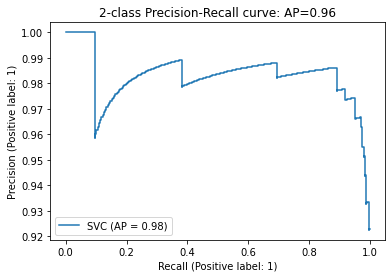

In [36]:
from sklearn.metrics import plot_precision_recall_curve

# Plot Precision-Recall Curve
disp = plot_precision_recall_curve(clf, X, Y)
disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(precision))

No Skill: ROC AUC=0.500


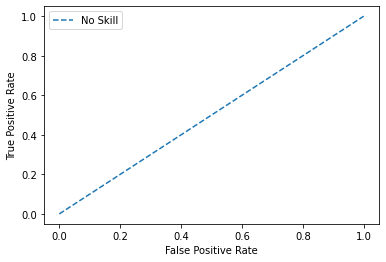

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(Y))]

# calculate scores
ns_auc = roc_auc_score(Y, ns_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y, ns_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()
pyplot.show()

## Regression Metrics

Regression refers to predictive modeling problems that involve predicting a numeric value.

It is different from classification that involves predicting a class label. Unlike classification, you cannot use classification accuracy to evaluate the predictions made by a regression model. Instead, you must use error metrics specifically designed for evaluating predictions made on regression problems and it is most Robust to outliers.

The following are the metrics for evaluating regression problems:

- Max Error
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error
- Mean Squared Logarithmic Error
- Median Absolute Error
- R-Squared
- Explained Variance
- Mean Poisson Deviance
- Mean Gamma Deviance
- Mean Absolute Percentage Error

In the following seccion, we will discuss more details of the most common metrics.

### Mean Absolute Error (MAE)

MAE is a very simple metric which calculates the absolute difference between actual and predicted values. It has the advantage that the MAE you get is in the same unit as the output variable.

In contrast, the disadvantage is that the graph of MAE is not differentiable so we have to apply various optimizers like gradient descent which can be differentiable.

This metric is described with the following equation:

\begin{equation}
MAE = \frac{1}{n} \sum_{1=n}^{i=1} \left|h(x_n) - y_n\right|
\end{equation}

### Mean Squared Error (MSE)

It represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE. MSE is a most used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference between actual and predicted value.

So, above we are finding the absolute difference and here we are finding the squared difference. The graph of MSE is differentiable, so you can easily use it as a loss function.

It has the disadvantage that the value you get after calculating MSE is a squared unit of output. For example, the output variable is in meter (m) then after calculating MSE the output we get is in meter squared and if the data has outliers t then it penalizes the outliers most and the calculated MSE is bigger. So, in short, it is not robust to outliers which were an advantage in MAE.

This metric is described with the following equation:

\begin{equation}
MSE = \frac{1}{n} \sum_{1=n}^{i=1} \left(h(x_n) - y_n\right)^2
\end{equation}

### Root Mean Squared Error (RMSE)

As RMSE is clear by the name itself, that it is a simple square root of mean squared error. It has the advantage that the output value you get is in the same unit as the required output variable which makes interpretation of loss easy, but it is not that robust to outliers as compared to MAE.

This metric is described with the following equation:

\begin{equation}
RMSE = \sqrt{\frac{1}{n} \sum_{1=n}^{i=1} \left(h(x_n) - y_n\right)^2}
\end{equation}

### Root Mean Squared Logarithmic Error (RMSLE)

Taking the $\log$ of the RMSE metric slows down the scale of error. The metric is very helpful when you are developing a model without calling the inputs. In that case, the output will vary on a large scale. To control this situation of RMSE we take the $\log$  of calculated RMSE error and resultant we get as RMSLE.

This metric is described with the following equation:

\begin{equation}
RMSLE = \sqrt{\frac{1}{n} \sum_{1=n}^{i=1} \left( \log \left(h(x_n) + 1\right) - \log \left( y_n + 1 \right) \right)^2}
\end{equation}

### R Squared ($R^2$)

$R^2$ score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform. In contrast, MAE and MSE depend on the context as we have seen whereas the R2 score is independent of context.

So, with help of R squared we have a baseline model to compare a model which none of the other metrics provides. The same we have in classification problems which we call a threshold which is fixed at 0.5. So basically R2 squared calculates how must regression line is better than a mean line.

This metric is described with the following equation:

\begin{equation}
R^2 = 1 - \frac{RSS}{TSS}
\end{equation}

Where RSS is the Residual Sum of Squares and TSS is the Total Sum of Squares. They are described with the following formulas:

\begin{equation}
RSS =  \sum_{1=n}^{i=1} \left(h(x_n) - y_n\right)^2
\end{equation}

\begin{equation}
TSS =  \sum_{1=n}^{i=1} \left(h(x_n) - \overline{y}\right)^2
\end{equation}

### Adjusted R Squared

The disadvantage of the R2 score is while adding new features in data the R2 score starts increasing or remains constant but it never decreases because It assumes that while adding more data variance of data increases.

But the problem is when we add an irrelevant feature in the dataset then at that time R2 sometimes starts increasing which is incorrect. Hence, To control this situation adjusted R Squared came into existence.

This metric is described with the following equation:

\begin{equation}
R^2_a = 1 - \left| \left( \frac{n-1}{n-k-1}\right) \times  \left(1 - R2\right) \right|
\end{equation}

Where $k$ is the number of independent variables, $n$ is the number of observations, and $R^2$ is the R squared value.

**References**: 

- https://towardsdatascience.com/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce
- https://machinelearningmastery.com/regression-metrics-for-machine-learning/
- https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/

In [38]:
# Simple Example of Regression Metrics
# Notebook from: https://app.neptune.ai/theaayushbajaj/sandbox/n/f884bbea-5263-4aeb-aa35-18d74b2835b9/41813125-2b9d-4332-b73f-f07c3b977372
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x, y)
y_hat = regressor.predict(x)

In [39]:
mae = np.abs(y-y_hat)

print(f"MAE: {mae.mean():0.2f} (+/- {mae.std():0.2f})")

MAE: 3.27 (+/- 3.35)


In [40]:
mse = (y-y_hat)**2

print(f"MSE: {mse.mean():0.2f} (+/- {mse.std():0.2f})")

MSE: 21.89 (+/- 59.14)


In [41]:
mse = (y-y_hat)**2

rmse = np.sqrt(mse.mean())

print(f"RMSE: {rmse:0.2f}")

RMSE: 4.68


In [42]:
# R^2 coefficient of determination
SE_line = sum((y-y_hat)**2)
SE_mean = sum((y-y.mean())**2)

r2 = 1-(SE_line/SE_mean)

print(f"R^2 coefficient of determination: {r2*100:0.2f}%")

R^2 coefficient of determination: 74.06%
